## Employee Churn Dataset

About the Data

This dataset contains information about employees in a company, including their educational backgrounds, work history, demographics, and employment-related factors. It has been anonymized to protect privacy while still providing valuable insights into the workforce.

Goal:- The classification goal is to predict if the Employee will Churn / Attrition (1 / 0) in the company.

Features of train data are listed below


1. **Education:** The educational qualifications of employees, including degree, institution, and field of study.

2. **Joining Year:** The year each employee joined the company, indicating their length of service.

3. **City:** The location or city where each employee is based or works.

4. **Payment Tier:** Categorization of employees into different salary tiers.

5. **Age:** The age of each employee, providing demographic insights.

6. **Gender:** Gender identity of employees, promoting diversity analysis.

7. **Ever Benched:** Indicates if an employee has ever been temporarily without assigned work.

8. **Experience in Current Domain:** The number of years of experience employees have in their current field.

Target Column

9. **Leave or Not:** Whether employee left us or Not (1 = Left)

---

**What is our Key target for ML?**

Are there any patterns in leave-taking behavior among employees?


### **Importing Data**

In [94]:
import pandas as pd

df = pd.read_csv('Employee.csv')
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [95]:
df_1 = df.copy()
df_1

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [96]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Data Cleaning**

In [97]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [99]:
df.duplicated().sum()

1889

In [100]:
df[df.duplicated()]

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
111,Bachelors,2017,Pune,2,27,Female,No,5,1
130,Bachelors,2017,Bangalore,3,26,Female,No,4,0
138,Bachelors,2017,New Delhi,3,28,Male,No,2,0
160,Bachelors,2014,Bangalore,3,28,Female,No,3,0
167,Bachelors,2014,Bangalore,3,25,Male,No,3,0
...,...,...,...,...,...,...,...,...,...
4640,Bachelors,2015,Bangalore,3,35,Male,No,0,0
4642,Bachelors,2012,Bangalore,3,36,Female,No,4,0
4646,Bachelors,2013,Bangalore,3,25,Female,No,3,0
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0


In [101]:
def transform_leave_status(value):
    if value == 1:
        return 'Left'
    else:
        return 'Active'

df['LeaveOrNot'] = df['LeaveOrNot'].apply(transform_leave_status)
df['LeaveOrNot'].value_counts()

LeaveOrNot
Active    3053
Left      1600
Name: count, dtype: int64

In [102]:
# Separate columns by data type
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Print the list of categorical columns
print("Categorical Columns:")
print(categorical_columns)

# Print the list of numerical columns
print("\nNumerical Columns:")
print(numerical_columns)


Categorical Columns:
Index(['Education', 'City', 'Gender', 'EverBenched', 'LeaveOrNot'], dtype='object')

Numerical Columns:
Index(['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain'], dtype='object')


### **Exploratory Data Analysis**

#### UNIVARIATE

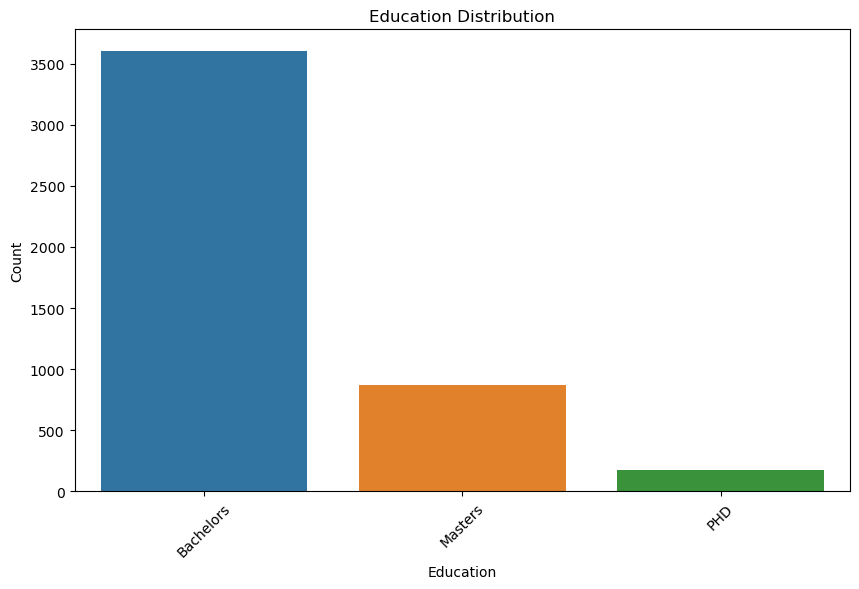

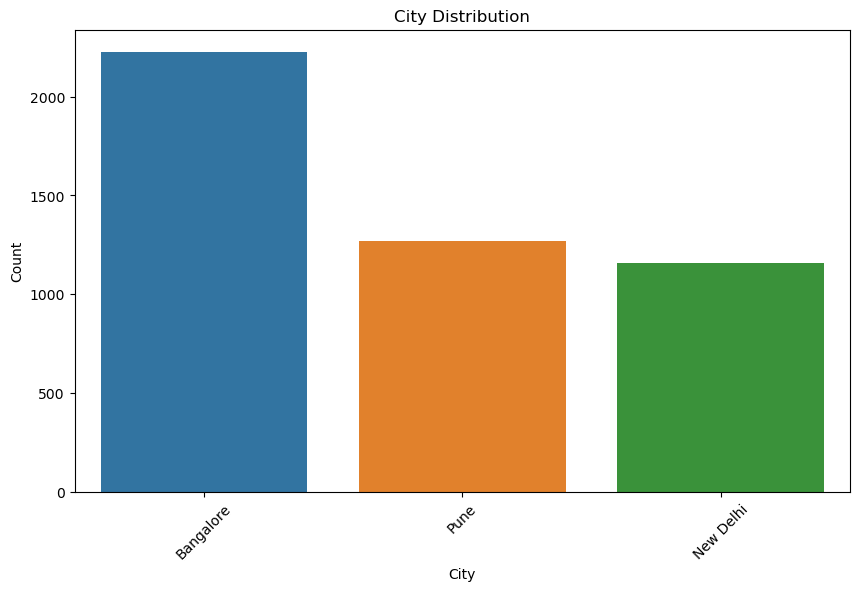

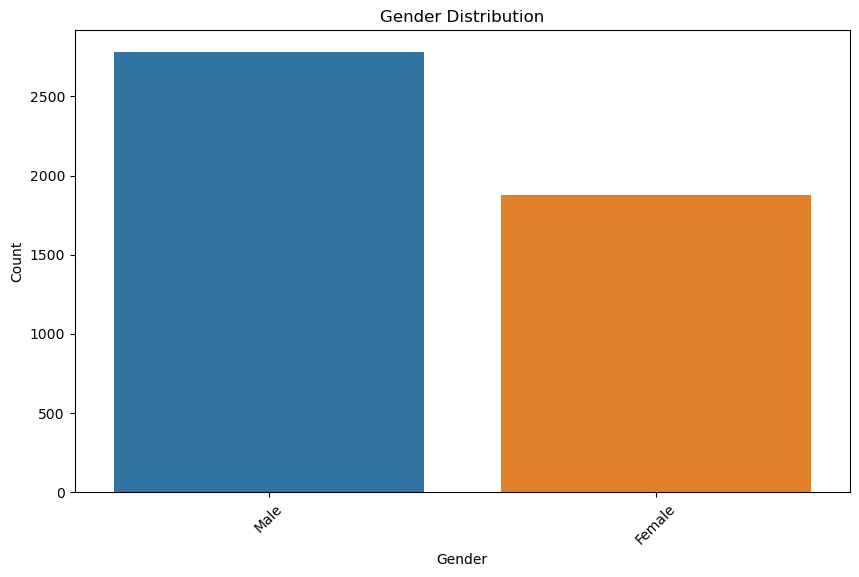

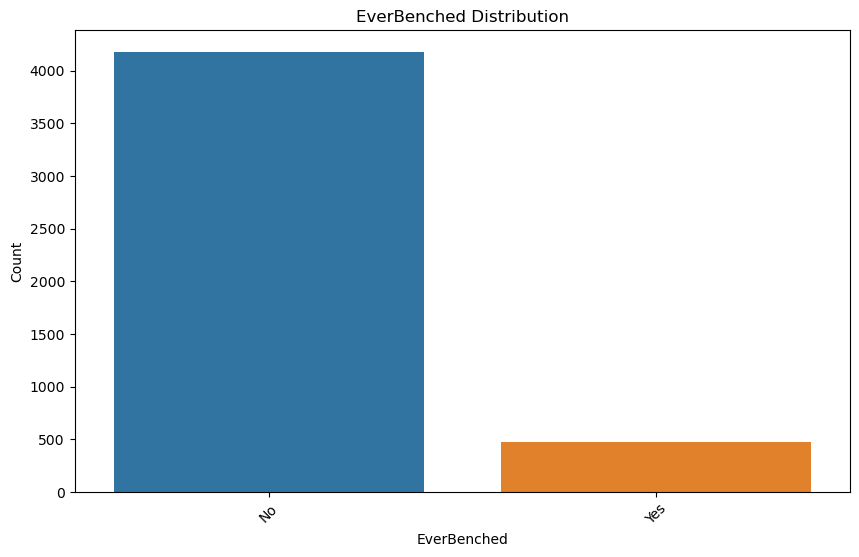

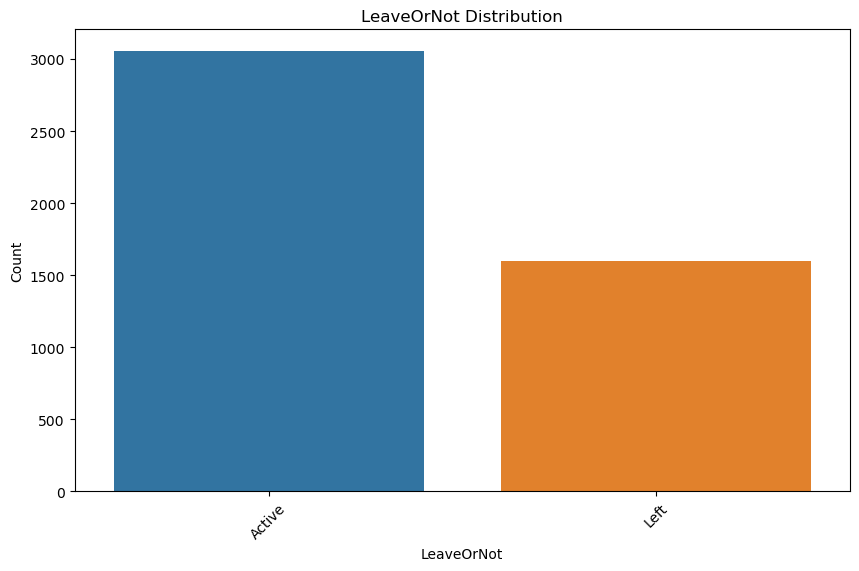

In [103]:
def plot_categorical(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

for column in categorical_columns:
    plot_categorical(df, column)

##### Categorical Variables Insight

- The analysis indicates that the highest number of employees who left the company are from Bangalore, followed by Pune and then New Delhi.

- The majority of the employees hold Bachelor's degrees. This could indicate a strategic focus on hiring candidates with a strong educational foundation.

- There is a significant gender imbalance in the company's workforce, with considerably more male employees compared to female employees.

- The fourth graph illustrates that a relatively high number of employees have never been benched, while a smaller proportion has ever been benched. This suggests that the company may be effectively utilizing its workforce and minimizing instances where employees are temporarily without assigned work.

- The last chart reveals a notable difference in the distribution of employees who left the company (Left) compared to those who are still employed (Active). There are substantially more employees who have stayed with the company than those who have left, indicating potential areas for improvement in employee retention strategies.


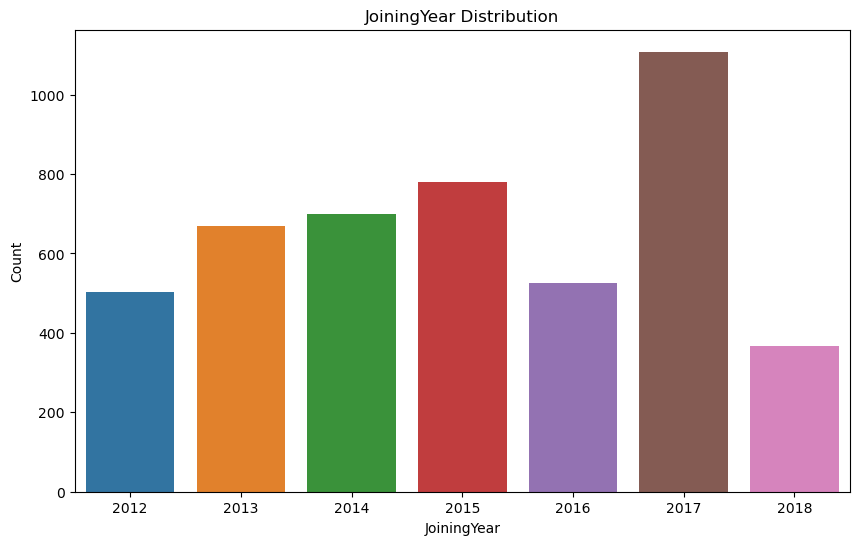

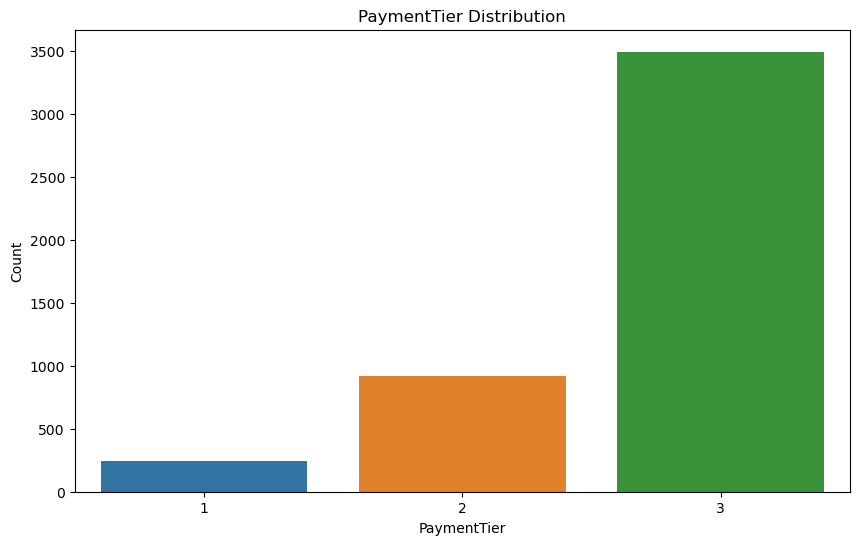

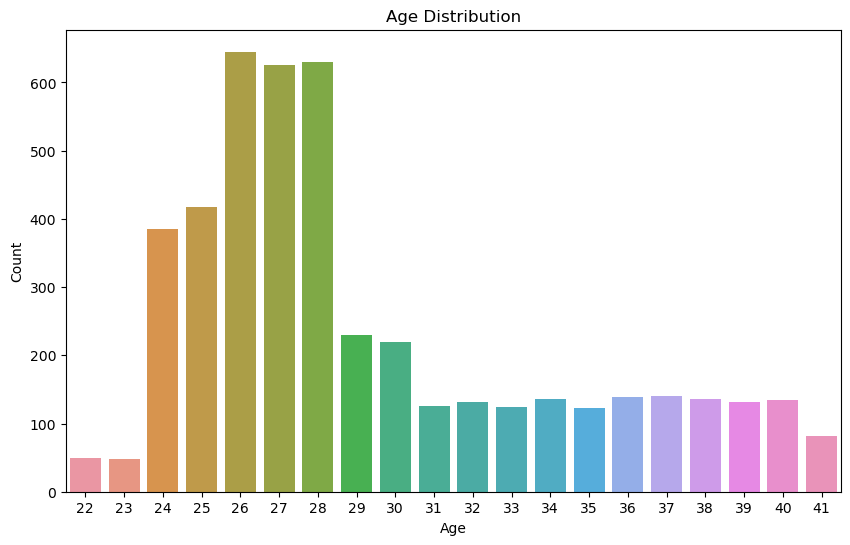

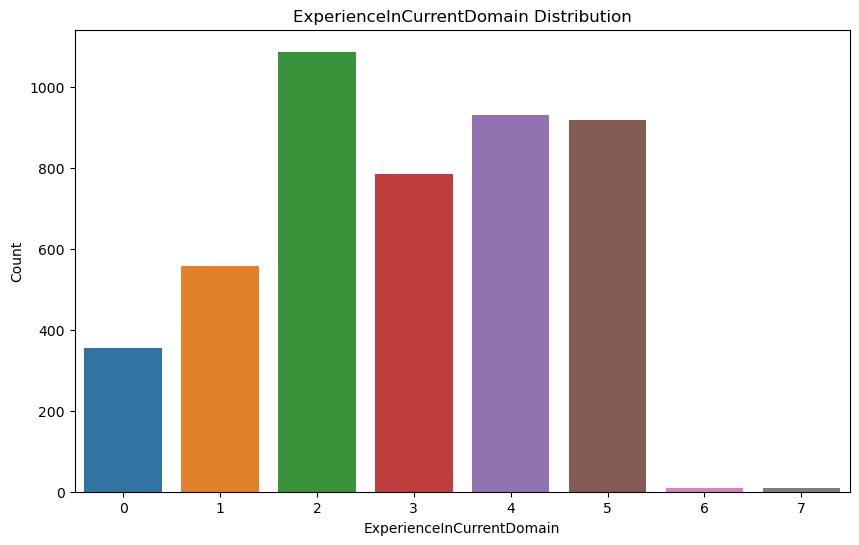

In [104]:
def plot_numerical_bar(df, column):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x=column, y=df.index, estimator=lambda x: len(x))
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.ylim(0)
    plt.show()

for column in numerical_columns:
    plot_numerical_bar(df, column)


##### Numerical Variables Insight

- The analysis suggests that the company hired a significant number of employees in 2017, followed by a decrease in hiring over the next year. This trend could be influenced by various factors, such as changes in business needs, budget constraints, or a strategic shift in talent acquisition strategies.

- A larger proportion of employees are in payment tiers 2 and 3 compared to payment tier 1. This indicates that a higher number of employees receive lower salaries or compensation packages, which may have implications for employee satisfaction and retention.

- The histogram reveals that the company's workforce skews younger, with a concentration of employees in their mid 20s to late 20s.

- The bar chart highlights that a high majority portion of the employees have 5 or fewer years of experience in their current domain. There appears to be a substantial decrease in the number of employees with more experience than 5 years, which may indicate turnover or promotion opportunities within the organization or externally.


#### BI UNIVARIATE

**Bachelors vs LeaveOrNot**

c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

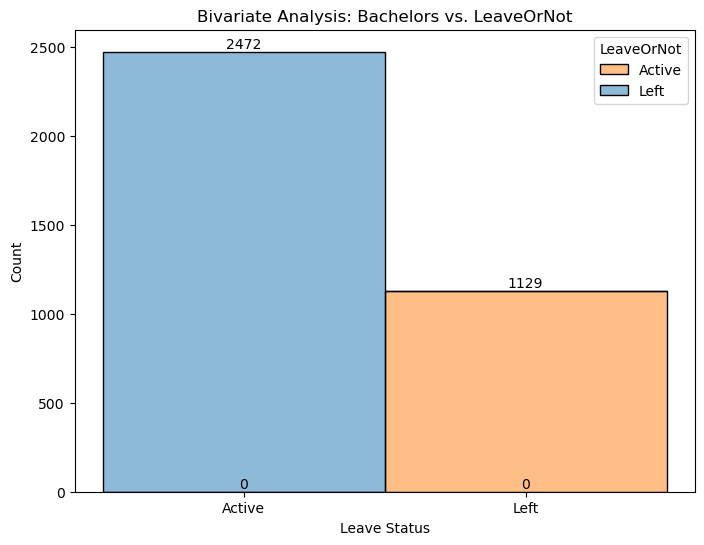

c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

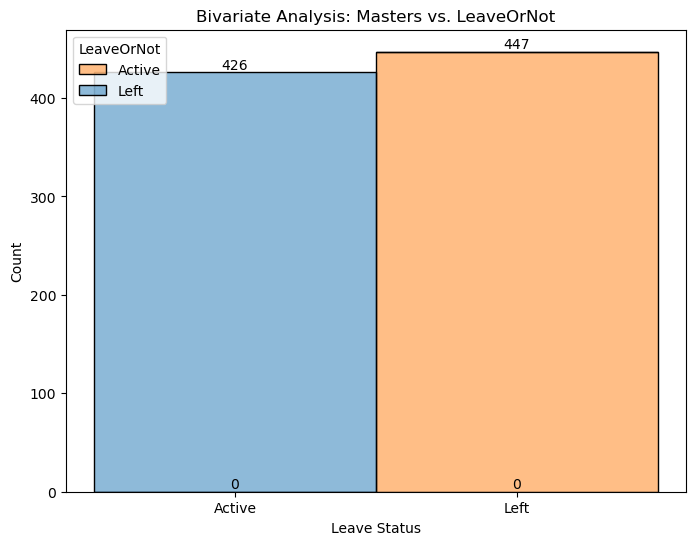

c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

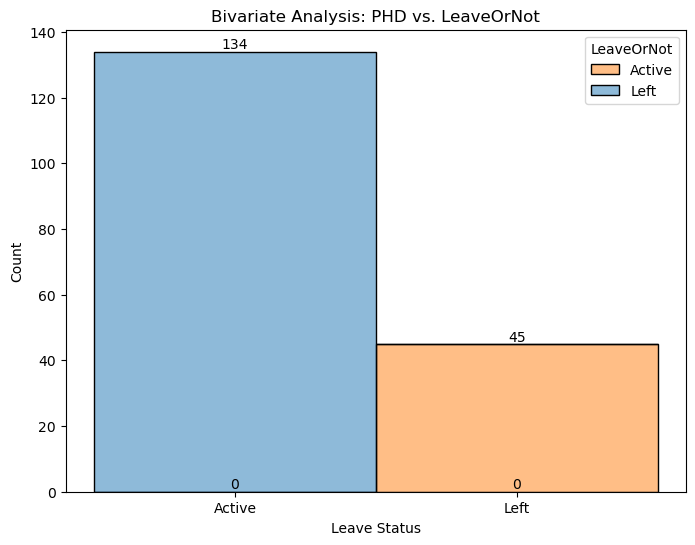

In [105]:
education_levels = df['Education'].unique()

for education_level in education_levels:
    education_df = df[df['Education'] == education_level]
    
    plt.figure(figsize=(8, 6))
    ax = sns.histplot(data=education_df, x='LeaveOrNot', hue='LeaveOrNot', multiple="stack", kde=True)
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    
    plt.title(f'Bivariate Analysis: {education_level} vs. LeaveOrNot')
    plt.xlabel('Leave Status')
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1], labels=['Active', 'Left'])
    plt.legend(title='LeaveOrNot', labels=['Active', 'Left'])
    plt.show()


- **Bachelors:** A higher proportion of employees with Bachelor's degrees remain active compared to those who left. This suggests potential satisfaction or retention factors associated with this educational level.
  
- **Masters:** There is a slight imbalance, with a slightly higher proportion of employees with Master's degrees leaving compared to those who remain active. Further investigation may reveal underlying factors influencing attrition.

- **PhD:** Similar to employees with Bachelor's degrees, individuals with Ph.D. qualifications show a higher proportion of active employees compared to those who left. This could reflect a positive correlation between higher education levels and employee retention.


**JoiningYear vs LeaveOrNot**

c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

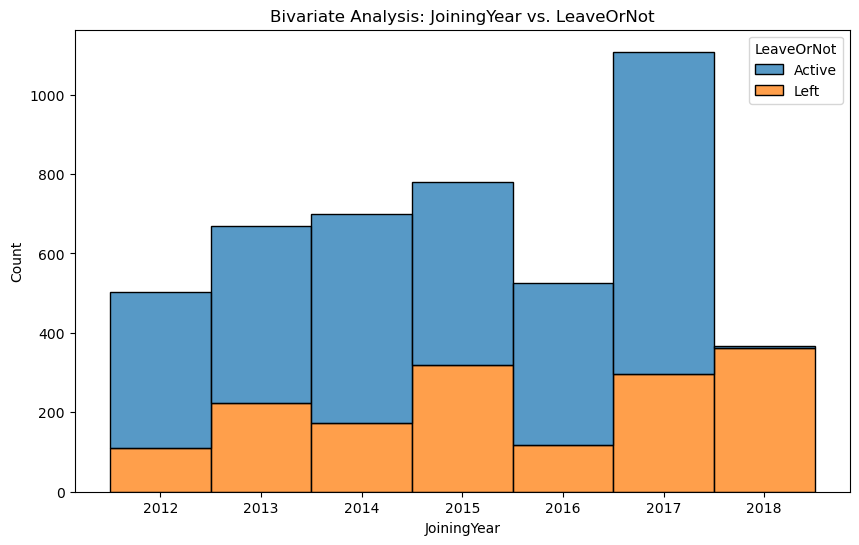

In [106]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='JoiningYear', hue='LeaveOrNot', multiple="stack", discrete=True)
plt.title('Bivariate Analysis: JoiningYear vs. LeaveOrNot')
plt.xlabel('JoiningYear')
plt.ylabel('Count')
plt.show()

**Joining Year vs. LeaveOrNot:**

  - **Positive Ratios:** In most years, the ratio of active to left employees is favorable, indicating higher retention rates. This reflects positively on the company's ability to retain talent.
  
  - **2018 Restructuring:** A notable anomaly in 2018 shows a drastic shift, with a significant increase in employees leaving and minimal active employees. This suggests a potential restructuring or organizational change during that period.


**Age vs LeaveOrNot**

c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

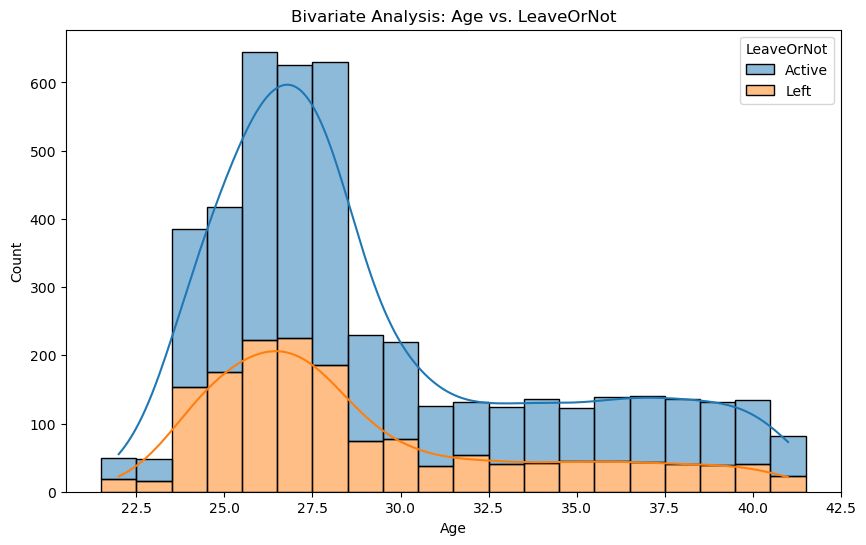

In [107]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='LeaveOrNot', multiple="stack", kde=True, discrete=True)
plt.title('Bivariate Analysis: Age vs. LeaveOrNot')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


**Age vs. LeaveOrNot:**
  - **Consistent Ratios:** The ratio of active to left employees remains relatively consistent across different age groups. This suggests that age alone may not be a significant factor influencing employee retention or attrition.


c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

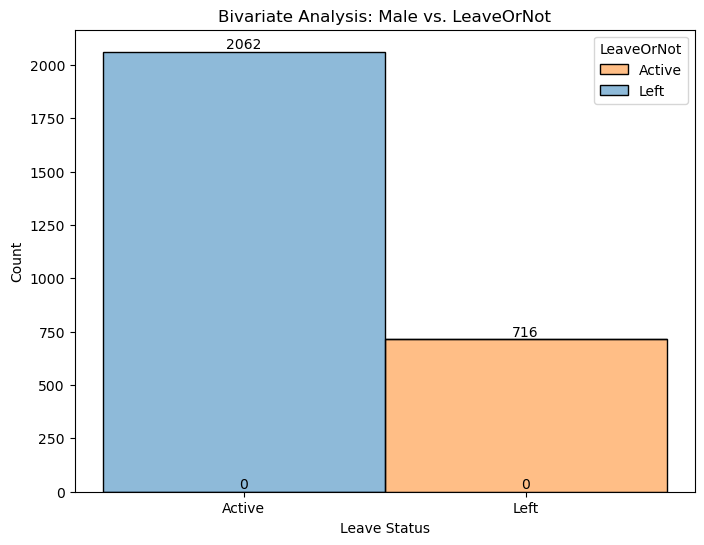

c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

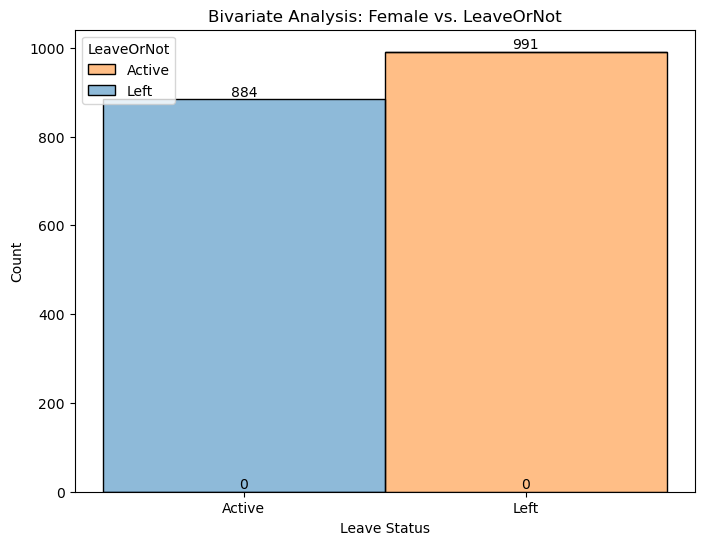

In [108]:
gender_levels = df['Gender'].unique()

for gender_levels in gender_levels:
    education_df = df[df['Gender'] == gender_levels]
    
    plt.figure(figsize=(8, 6))
    ax = sns.histplot(data=education_df, x='LeaveOrNot', hue='LeaveOrNot', multiple="stack", kde=True)
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    
    plt.title(f'Bivariate Analysis: {gender_levels} vs. LeaveOrNot')
    plt.xlabel('Leave Status')
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1], labels=['Active', 'Left'])
    plt.legend(title='LeaveOrNot', labels=['Active', 'Left'])
    plt.show()

**Gender vs. LeaveOrNot:**
  - **Male Employees:** The proportion of active male employees significantly exceeds those who left, indicating higher retention rates among males. This could reflect positive organizational culture or career opportunities.
  
  - **Female Employees:** While active female employees slightly outnumber those who left, the difference is smaller compared to males. This suggests potential gender-specific factors influencing attrition rates, warranting further investigation.


**Experience vs LeaveOrNot**

c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Syma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


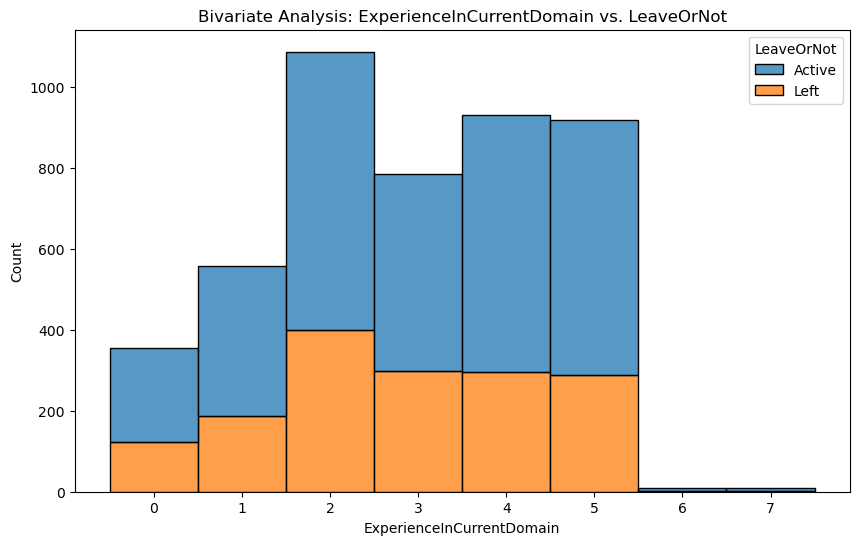

In [109]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ExperienceInCurrentDomain', hue='LeaveOrNot', multiple="stack", discrete=True)
plt.title('Bivariate Analysis: ExperienceInCurrentDomain vs. LeaveOrNot')
plt.xlabel('ExperienceInCurrentDomain')
plt.ylabel('Count')
plt.show()

**Experience in Current Domain:**
  - **Increasing Count:** The count of employees gradually increases up to 5 years of experience in their current domain, indicating a growing workforce with gaining experience.
  
  - **Substantial Decrease:** After 5 years, there is a significant decrease in the count, suggesting potential turnover or career advancements beyond this experience threshold.


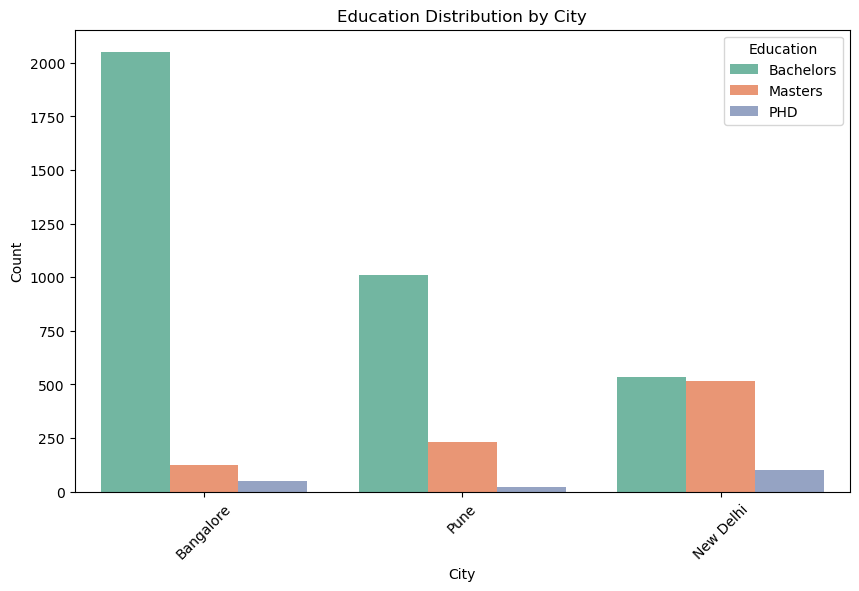

In [110]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='City', hue='Education', palette='Set2')
plt.title('Education Distribution by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Education', loc='upper right')
plt.xticks(rotation=45)
plt.show()

#### MULTI VARIATE

##### Education and PaymentTier

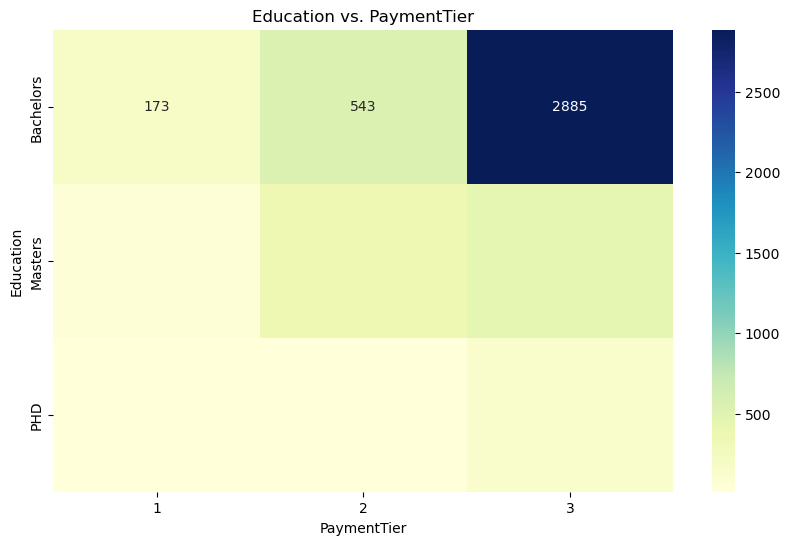

In [111]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['Education'], df['PaymentTier']), cmap='YlGnBu', annot=True, fmt='d')
plt.title('Education vs. PaymentTier')
plt.show()

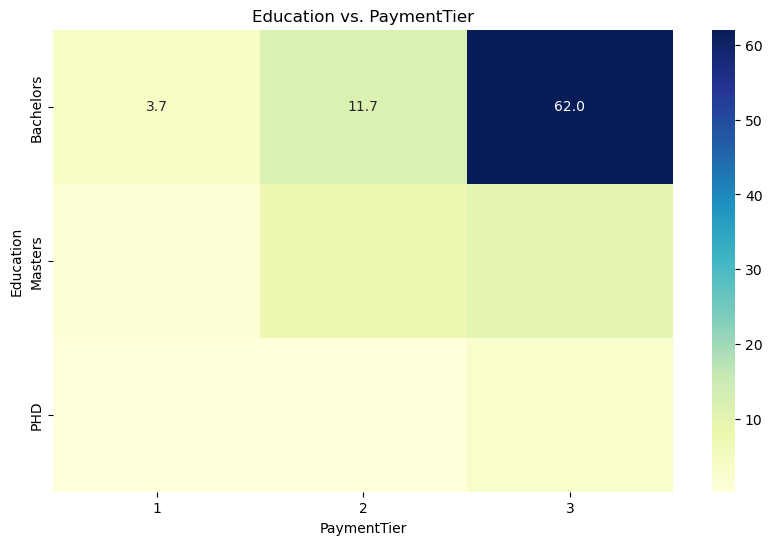

In [112]:
cross_tab = pd.crosstab(df['Education'], df['PaymentTier'], normalize='all')
cross_tab_percent = cross_tab * 100

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab_percent, cmap='YlGnBu', annot=True, fmt='.1f')  # fmt='.1f' to display values with one decimal place
plt.title('Education vs. PaymentTier')
plt.xlabel('PaymentTier')
plt.ylabel('Education')
plt.show()


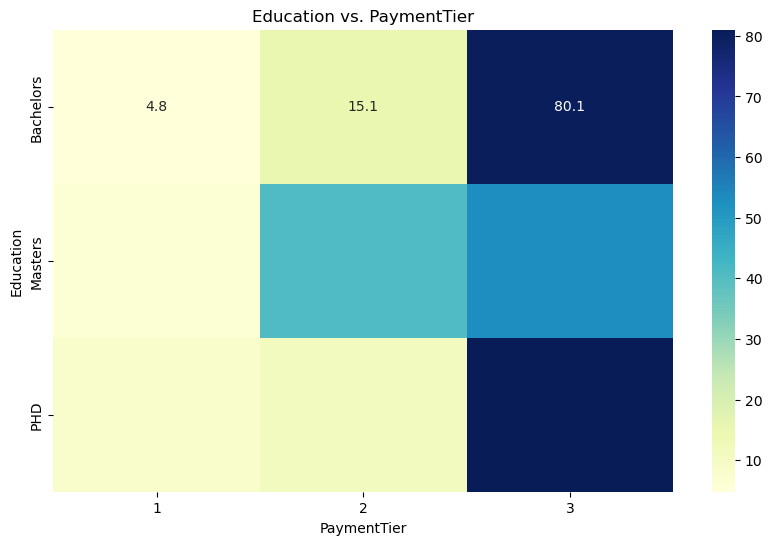

In [113]:
cross_tab = pd.crosstab(df['Education'], df['PaymentTier'], normalize='index')
cross_tab_percent = cross_tab * 100

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab_percent, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Education vs. PaymentTier')
plt.xlabel('PaymentTier')
plt.ylabel('Education')
plt.show()

**Education vs. Payment Tier:**
  - **Bachelors:** The majority of employees with Bachelor's degrees were paid in the third tier, with 2885 individuals falling into this category. This suggests a trend where individuals with Bachelor's degrees are typically compensated at a higher level, potentially reflecting their skillset and market demand.
  
  - **Masters:** Similarly, employees with Master's degrees were predominantly placed in the third tier, although the count is lower compared to Bachelors. This indicates a continuation of the trend observed with Bachelor's degree holders, albeit with fewer individuals in the higher payment tiers. It may suggest that a Master's degree provides a competitive advantage in salary negotiations or job roles that warrant higher compensation.
  
  - **PhDs:** Employees with Ph.D. qualifications also showed a preference for the third payment tier, although the count is significantly lower compared to Bachelors and Masters. This observation suggests that while individuals with Ph.D. qualifications may command higher salaries, they may be relatively less prevalent in the workforce or may have different priorities beyond monetary compensation.


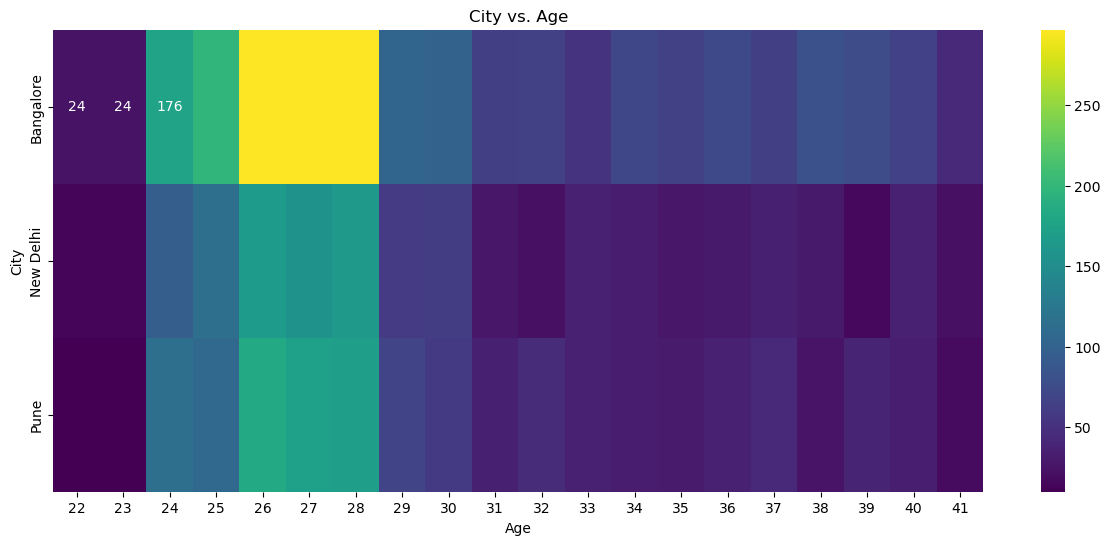

In [114]:
plt.figure(figsize=(15, 6))  # Set the size of the figure
sns.heatmap(pd.crosstab(df['City'], df['Age']), cmap='viridis', annot=True, fmt='d')
plt.title('City vs. Age')
plt.show()



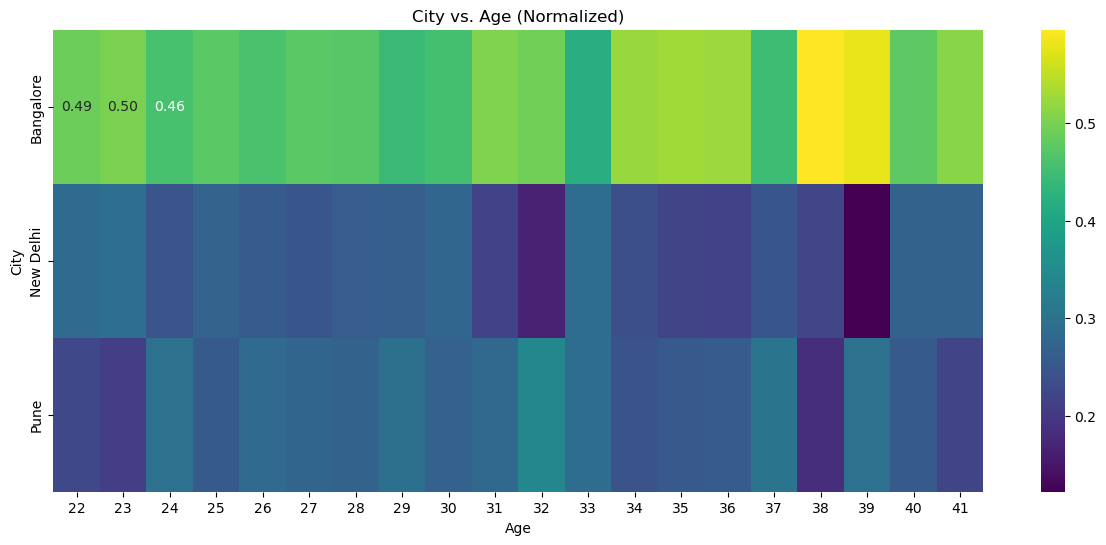

In [115]:
cross_tab = pd.crosstab(df['City'], df['Age'])
normalized_cross_tab = cross_tab.div(cross_tab.sum(axis=0), axis=1)

plt.figure(figsize=(15, 6))
sns.heatmap(normalized_cross_tab, cmap='viridis', annot=True, fmt='.2f')
plt.title('City vs. Age (Normalized)')
plt.xlabel('Age')
plt.ylabel('City')
plt.show()


**City vs. Age:**
  - **Bangalore:** The age distribution in Bangalore shows a strong emphasis on the 26-28 age range, with significantly higher counts compared to other cities. This suggests a demographic trend where younger individuals are prevalent in the workforce, potentially reflecting the city's vibrant tech and startup culture.
  
  - **Hiring Trends:** Bangalore also demonstrates a higher overall number of hires across various age groups compared to other cities. This could indicate the city's status as a major hub for talent acquisition and employment opportunities across different age demographics.
  
  - **New Delhi and Pune:** Both New Delhi and Pune exhibit similar age distribution patterns, with a noticeable concentration in the 26-28 age range. However, Pune shows a slightly higher count in this range, while New Delhi experiences a gradual decline in employee count after 30. These variations may be influenced by regional economic factors, industry preferences, or demographic trends specific to each city.


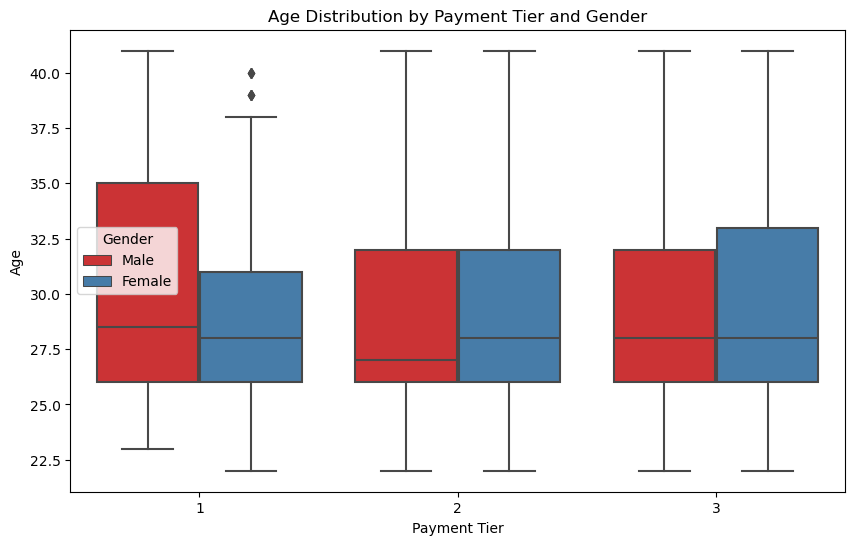

In [116]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='PaymentTier', y='Age', hue='Gender', palette='Set1')
plt.title('Age Distribution by Payment Tier and Gender')
plt.xlabel('Payment Tier')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.show()

**Age Distribution by Payment Tier and Gender:**
  - **1st Payment Tier:** 
    - **Males:** A larger proportion of males were allocated to the 1st payment tier, with a generally older age range. The youngest male employee in this tier was 23 years old, while females entered at 22. This indicates a trend where males may have longer tenures or higher salaries at lower tiers.
    - **Females:** Females were predominantly paid the 1st tier by 38 years, while males continued into their 40s. This disparity may reflect gender-based wage discrepancies or career progression differences.
  
  - **2nd Payment Tier:**
    - **Similar Distribution:** Both genders show similar patterns in the 2nd payment tier, except for a slightly higher mean age among females. This suggests comparable career trajectories or compensation structures between genders at this tier.
    
  - **3rd Payment Tier:**
    - **Gender Parity:** Both genders exhibit similar distributions in the 3rd payment tier, with minor differences in the upper quartile for age favoring females. This indicates equitable compensation practices in the upper tiers, with potential variations in age profiles.
    
  - **Age Quartiles:**
    - **Consistent Quartiles:** The lower quartile age for all genders in all tiers remains consistent at 26 years, reflecting a common entry point into the workforce. However, the maximum age is slightly lower for females across all tiers, suggesting potential differences in career longevity or retirement ages between genders.


### **Feature Engineering**

In [117]:
features = ['Education', 'JoiningYear', 'PaymentTier', 'Age', 'Gender', 'EverBenched']

X = df[features]
y = df['LeaveOrNot']

X.head()

,Education,JoiningYear,PaymentTier,Age,Gender,EverBenched
0,Bachelors,2017,3,34,Male,No
1,Bachelors,2013,1,28,Female,No
2,Bachelors,2014,3,38,Female,No
3,Masters,2016,3,27,Male,No
4,Masters,2017,3,24,Male,Yes


### **Spliting the data**

In [118]:
from sklearn.preprocessing import OneHotEncoder

features_numerical = ['JoiningYear','Age']
features_categorical = ['Education','PaymentTier','Gender','EverBenched']

enc = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform="pandas")
enc_fit= enc.fit(X[features_categorical])
X_encoded = enc_fit.transform(X[features_categorical])

X_encoded

,Education_Bachelors,Education_Masters,Education_PHD,PaymentTier_1,PaymentTier_2,PaymentTier_3,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
4648,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4649,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4650,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4651,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [119]:
from sklearn.preprocessing import StandardScaler

features_numerical = ['JoiningYear', 'Age']

scaler = StandardScaler()
scaler.fit(X[features_numerical])

X_scaled_numerical = scaler.transform(X[features_numerical])
X_scaled_numerical_df = pd.DataFrame(X_scaled_numerical, columns=features_numerical)

X_processed = pd.concat([X_encoded, X_scaled_numerical_df], axis=1)

### **Model Creation & Training**

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)

print("Logistic Regression Accuracy:", logistic_accuracy)

Logistic Regression Accuracy: 0.7056928034371643


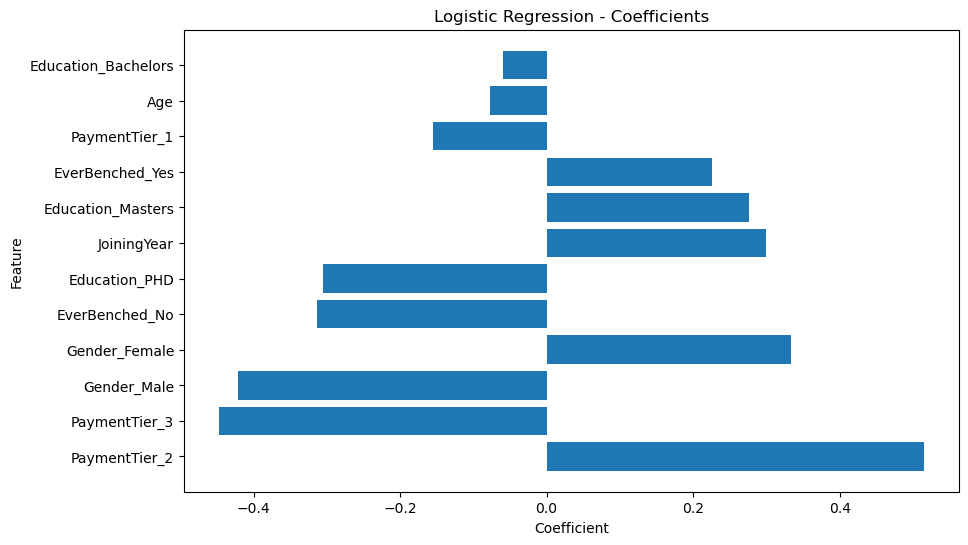

In [122]:
coefficients = logistic_model.coef_[0]
coefficient_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})
coefficient_df['Abs_Coefficient'] = abs(coefficient_df['Coefficient'])
coefficient_df = coefficient_df.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coefficient_df['Feature'], coefficient_df['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Logistic Regression - Coefficients')
plt.show()

- The logistic regression model achieved an accuracy of approximately 70.57% on the test data, indicating moderate predictive performance. 

- The coefficient analysis reveals that certain features have a notable impact on the prediction outcome. Notably, 'EverBenched_Yes', 'JoiningYear', 'Education_Masters', 'Gender_Female', and 'PaymentTier_2' exhibit positive coefficients, suggesting a positive association with the likelihood of an employee leaving. Conversely, features with negative coefficients, such as 'Education_Bachelors', 'Education_PhD', 'PaymentTier_1', and 'Gender_Male', indicate a lower likelihood of leaving.

#### Decision Tree

In [123]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.8270676691729323


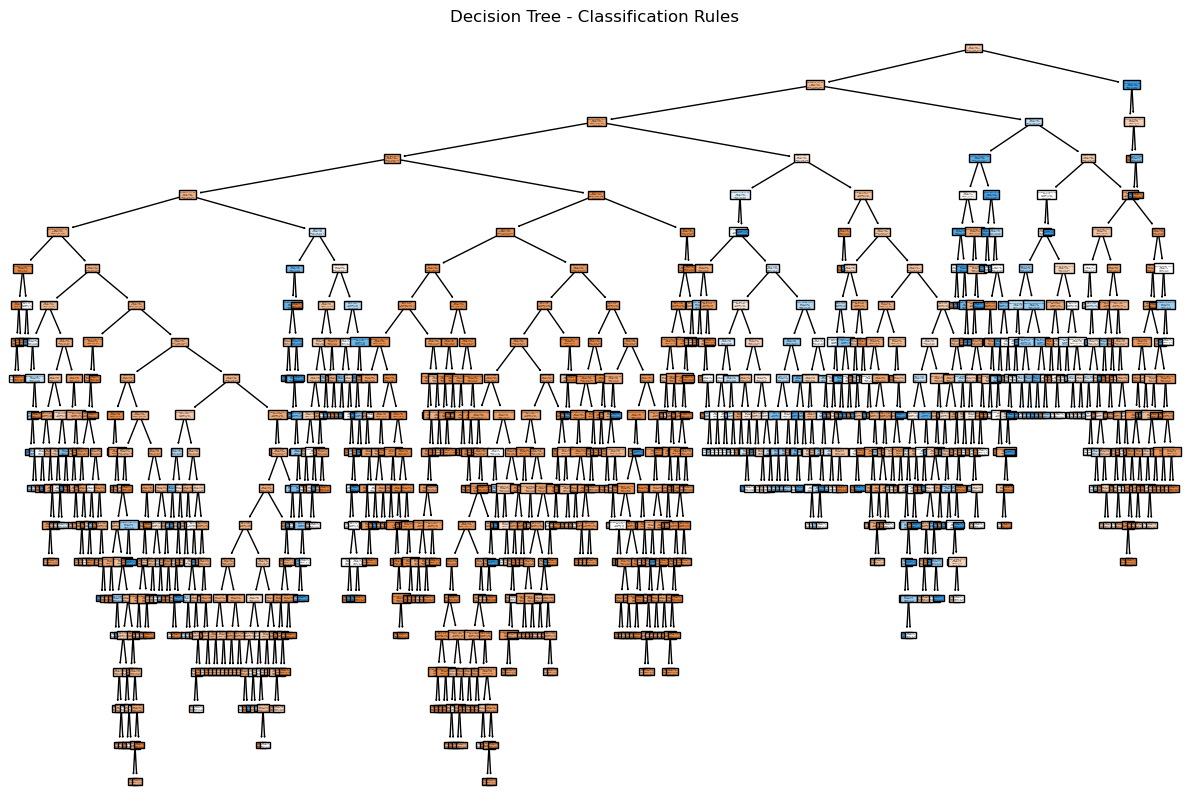

In [124]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X_train.columns, class_names=['Stay', 'Leave'], filled=True)
plt.title('Decision Tree - Classification Rules')
plt.show()

- The decision tree model achieved an accuracy of approximately 82.71% on the test data, indicating relatively strong predictive performance.

- However, upon visualizing the decision tree plot, it appears to be overly complex with numerous leaf nodes and decision nodes. This complexity suggests potential overfitting of the model to the training data, where the model may have learned to memorize noise rather than capture meaningful patterns in the data.

#### Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8281417830290011


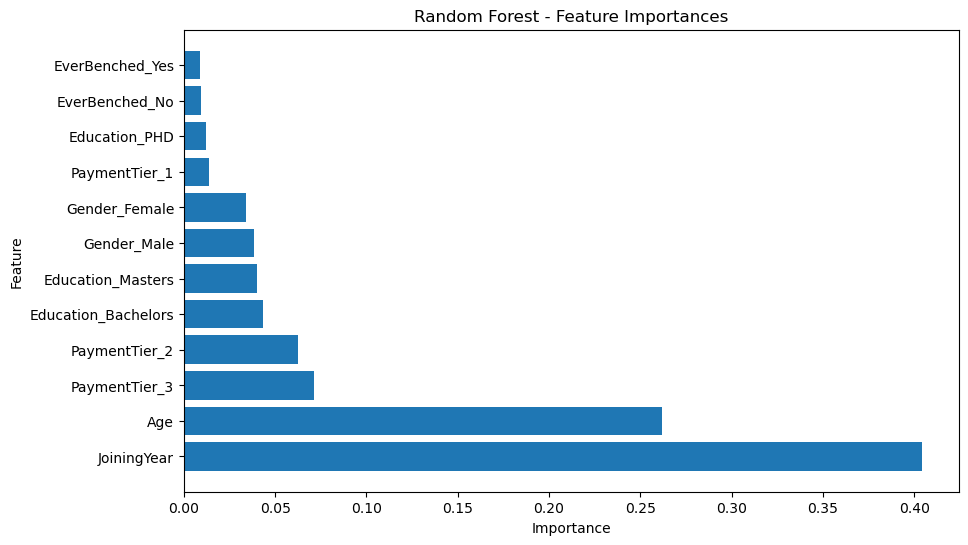

In [126]:
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest - Feature Importances')
plt.show()

- The random forest model achieved an accuracy of approximately 82.81% on the test data, indicating robust predictive performance.

- The feature importance analysis reveals that 'JoiningYear' is the most influential feature in predicting employee attrition, followed by 'Age', 'PaymentTier_3', 'PaymentTier_2', 'Education_Bachelors', 'Education_Masters', 'Gender_Male', 'Gender_Female', 'PaymentTier_1', 'Education_PhD', 'EverBenched_No', and 'EverBenched_Yes'. 

- These findings align with our earlier insights, suggesting that factors such as tenure, age, and education level significantly impact employee retention.


### **Model Evaluation**

**Metric Selection**: Accuracy

**Model Used**: Random Forest had the highest accuracy out of the models we tested the data on

**Reasoning:** Accuracy is a common metric used for binary classification problems like predicting whether an employee will leave or not.

In [127]:
clf = RandomForestClassifier(random_state=42)

In [128]:
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
y_train_pred = clf.predict(X_train)
training_accuracy = accuracy_score(y_pred=y_train_pred, y_true=y_train)

print("Accuracy:", training_accuracy)

Accuracy: 0.8648576034390113


- The random forest classifier achieved an accuracy of approximately 86.49% on the training data, indicating strong performance in predicting employee attrition.

- This high accuracy suggests that the model effectively captures patterns and relationships within the training dataset. However, it's essential to assess the model's performance on unseen data to ensure its generalizability and effectiveness in real-world scenarios.


### **Model Prediction**

In [129]:
y_test_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
training_accuracy = accuracy_score(y_pred=y_test_pred, y_true=y_test)

print("Accuracy:", training_accuracy)

Accuracy: 0.8281417830290011


- The random forest classifier achieved an accuracy of approximately 82.81% on the test data, indicating strong predictive performance and generalizability to unseen observations.

- This accuracy level is consistent with the performance observed on the training data, suggesting that the model effectively captures underlying patterns in the data and performs well on new observations.

### **Model Training Accuracy Report**

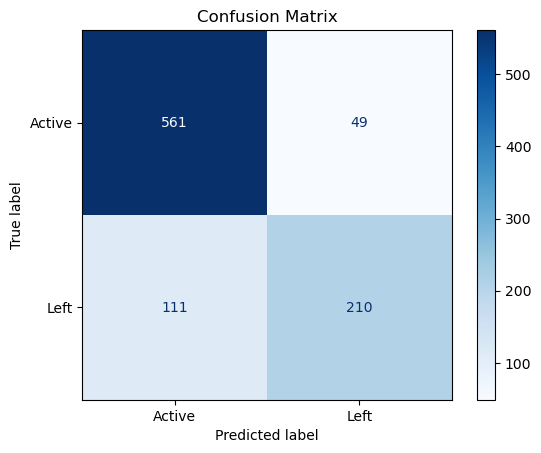

In [130]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix provides a detailed breakdown of the model's predictions on the test data.

- True Active Predicted Active: The model correctly predicted 561 instances where employees remained active, and correctly predicted 210 instances where employees left the company.
  
- True Left Predicted Active: The model incorrectly predicted 111 instances where employees left the company as active, and 49 instances where employees remained active as left.

This analysis highlights the model's ability to correctly classify the majority of instances, with a notable proportion of false positives (employees incorrectly classified as active when they left) and false negatives (employees incorrectly classified as left when they remained active). Further optimization of the model may be necessary to reduce these errors and improve overall performance.


In [131]:
from sklearn.metrics import classification_report

dt_classification_report = classification_report(y_test, dt_pred)

print("Classification Report for Random Forest Model:")
print(dt_classification_report)

Classification Report for Random Forest Model:
              precision    recall  f1-score   support

      Active       0.83      0.93      0.88       610
        Left       0.82      0.64      0.72       321

    accuracy                           0.83       931
   macro avg       0.83      0.78      0.80       931
weighted avg       0.83      0.83      0.82       931



The classification report provides a comprehensive evaluation of the random forest model's performance on the test data.

- Precision: The model achieved a precision of 83% for predicting active employees and 82% for predicting employees who left the company. This indicates the proportion of correctly classified instances among the predicted positives.

- Recall: The model achieved a recall of 93% for active employees and 64% for employees who left. This reflects the proportion of correctly classified instances among the actual positives.

- F1-score: The F1-score, which is the harmonic mean of precision and recall, is 88% for active employees and 72% for employees who left. It provides a balanced measure of the model's performance across precision and recall.

- Accuracy: The overall accuracy of the model is 83%, indicating the proportion of correctly classified instances among all instances.

The macro average and weighted average metrics provide aggregated scores across classes, accounting for class imbalance. The macro average F1-score is 80%, while the weighted average F1-score is 82%.

Overall, the classification report indicates that the random forest model performs well in predicting active employees, with high precision and recall. However, there is room for improvement in predicting employees who leave the company, particularly in terms of recall. Further optimization of the model may be necessary to achieve a better balance between precision and recall and improve overall predictive performance.


### **Model Interpretation & Key Learnings**

#### Interpretation:
- **Random Forest Model Performance**: The random forest model achieved an overall accuracy of 82.8% on the test data, indicating its ability to predict employee attrition with good accuracy.
  
- **Feature Importance**: The model identified 'JoiningYear' and 'Age 'as the most influential feature in predicting employee attrition, followed by 'PaymentTier', and 'Education'.

- **Precision and Recall**: The model demonstrated high precision (83%) for predicting active employees and moderate precision (82%) for predicting employees who left the company. However, recall was higher for active employees (93%) compared to those who left (64%), indicating that the model is better at identifying active employees than employees at risk of leaving.

#### Key Learnings:
- **Tenure and Age**: Employees' tenure and age are critical factors influencing attrition. Newer employees and younger individuals are more likely to leave the company, possibly due to career advancement opportunities or cultural fit issues.
  
- **Education and Payment Tier**: Higher education levels and payment tiers are associated with lower attrition rates. Employees with advanced degrees and higher salary tiers may feel more invested in their roles and have stronger career prospects, leading to higher retention.


In [132]:
def transform_leave_status(value):
    if value == 1:
        return 'Yes'
    else:
        return 'No'

df_1['LeaveOrNot'] = df_1['LeaveOrNot'].apply(transform_leave_status)
df_1['LeaveOrNot'].value_counts()

LeaveOrNot
No     3053
Yes    1600
Name: count, dtype: int64

In [133]:
# ML Pipeline
df.dtypes


Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                   object
dtype: object

In [134]:
X = df_1.drop('LeaveOrNot', axis=1)
y = df_1['LeaveOrNot'] 

In [135]:
# Get column datatypes
column_types = X.dtypes

In [136]:
# Initialize lists to store numerical and categorical column names
numerical_features = []
categorical_features = []

# Differentiate between numerical and categorical columns
for column_name, dtype in column_types.items():
    if dtype == 'object':
        categorical_features.append(column_name)
    else:
        numerical_features.append(column_name)

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']
Categorical Features: ['Education', 'City', 'Gender', 'EverBenched']


In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
def summarize_cat(X, categorical_features):
    results = []
    for column in categorical_features:
        # Get the unique members of the column
        members = X[column].unique().tolist()
        
        # Append the column name and its unique members to the results list
        results.append([column, members])
    
    # Create a DataFrame from the results list
    return pd.DataFrame(results, columns=['Column Name', 'Members'])

summarize_cat(X_train, categorical_features)
summarize_cat(X_train, categorical_features).to_dict()

{'Column Name': {0: 'Education', 1: 'City', 2: 'Gender', 3: 'EverBenched'},
 'Members': {0: ['Masters', 'Bachelors', 'PHD'],
  1: ['New Delhi', 'Bangalore', 'Pune'],
  2: ['Male', 'Female'],
  3: ['No', 'Yes']}}

In [139]:
my_feature_dict = {'CATEGORICAL' : summarize_cat(X_train,categorical_features).to_dict(), 'NUMERICAL' : {'Column Name': numerical_features}}

my_feature_dict

{'CATEGORICAL': {'Column Name': {0: 'Education',
   1: 'City',
   2: 'Gender',
   3: 'EverBenched'},
  'Members': {0: ['Masters', 'Bachelors', 'PHD'],
   1: ['New Delhi', 'Bangalore', 'Pune'],
   2: ['Male', 'Female'],
   3: ['No', 'Yes']}},
 'NUMERICAL': {'Column Name': ['JoiningYear',
   'PaymentTier',
   'Age',
   'ExperienceInCurrentDomain']}}

In [140]:

import pickle

# Export my_feature_dict as a pickle file
with open('my_feature_dict.pkl', 'wb') as f:
    pickle.dump(my_feature_dict, f)

print("my_feature_dict exported as pickle file successfully.")

my_feature_dict exported as pickle file successfully.


In [141]:
# Creating The Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Define the pipeline for categorical features
pipeline_cat = Pipeline(steps=[
    ('OneHotEncode', OneHotEncoder(handle_unknown="ignore"))
])

# Define the pipeline for numerical features
pipeline_num = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Scale the numerical features
])

# Define the preprocessing stage with ColumnTransformer
preprocessor_stage_1 = ColumnTransformer(
    transformers=[
        ('cat', pipeline_cat, categorical_features),
        ('num', pipeline_num, numerical_features)
    ],
    remainder="drop"
)

# Create the preprocessing stack pipeline
preprocessor_stack = Pipeline(steps=[
    ('preprocessor_stage_1', preprocessor_stage_1) 
])

# Since we didn't specify 'CUSTOMERID' in any of the categorical or numerical features (remainder='drop'), remove it out of the pipeline
preprocessor_stack

Pipeline(steps=[('preprocessor_stage_1',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('OneHotEncode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Education', 'City',
                                                   'Gender', 'EverBenched']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['JoiningYear', 'PaymentTier',
                                                   'Age',
                                                   'ExperienceInCurrentDomain'])]))])

In [142]:
preprocessor_stack.fit(X_train) 

Pipeline(steps=[('preprocessor_stage_1',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('OneHotEncode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Education', 'City',
                                                   'Gender', 'EverBenched']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['JoiningYear', 'PaymentTier',
                                                   'Age',
                                                   'ExperienceInCurrentDomain'])]))])

In [143]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_stack),
    ('classifier', RandomForestClassifier())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('preprocessor_stage_1',
                                  ColumnTransformer(transformers=[('cat',
                                                                   Pipeline(steps=[('OneHotEncode',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   ['Education',
                                                                    'City',
                                                                    'Gender',
                                                                    'EverBenched']),
                                                                  ('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['JoiningYear',
                                                                    'PaymentTier',
                                                                    'Age',
                                                                    'ExperienceInCurrentDomain'])]))])),
                ('classifier', RandomForestClassifier())])

In [144]:
# Checking Training Accuracy
y_train_pred = pipeline.predict(X_train)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

Accuracy: 0.9279957012358947

Classification Report:
               precision    recall  f1-score   support

          No       0.92      0.97      0.95      2443
         Yes       0.94      0.84      0.89      1279

    accuracy                           0.93      3722
   macro avg       0.93      0.91      0.92      3722
weighted avg       0.93      0.93      0.93      3722


Confusion Matrix:
 [[2374   69]
 [ 199 1080]]


In [145]:
my_pred_array=X_test.iloc[15:16:]
my_pred_array

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
1128,Bachelors,2015,Pune,2,26,Female,No,4


In [146]:
pd.DataFrame(preprocessor_stack.transform(my_pred_array),columns=preprocessor_stack[0].get_feature_names_out())
# Predict using the pipeline
y_pred = pipeline.predict(my_pred_array)
y_pred

array(['Yes'], dtype=object)

In [147]:
import dill

# Save the pipeline to a file
with open('pipeline_model.pkl', 'wb') as f:
    dill.dump(pipeline, f)
print("pipeline saved successfully to file")

pipeline saved successfully to file


In [148]:
%%writefile app.py

import streamlit as st
import pandas as pd
from joblib import load
import dill

# Load the pretrained model
with open('pipeline_model.pkl', 'rb') as file:
    model = dill.load(file)

my_feature_dict = load('my_feature_dict.pkl')

# Function to predict churn
def predict_churn(data):
    prediction = model.predict(data)
    return prediction

st.title('Employee Churn Prediction App')
st.subheader('Based on Employee Dataset')

# Display categorical features
st.subheader('Categorical Features')
categorical_input = my_feature_dict.get('CATEGORICAL')
categorical_input_vals = {}
for i, col in enumerate(categorical_input.get('Column Name').values()):
    categorical_input_vals[col] = st.selectbox(col, categorical_input.get('Members')[i])

# Load numerical features
numerical_input = my_feature_dict.get('NUMERICAL')

# Display numerical features
st.subheader('Numerical Features')
numerical_input = my_feature_dict.get('NUMERICAL')
numerical_input_vals = {}
for col in numerical_input.get('Column Name'):
    numerical_input_vals[col] = st.number_input(col)

# Combine numerical and categorical input dicts
input_data = dict(list(categorical_input_vals.items()) + list(numerical_input_vals.items()))

input_data= pd.DataFrame.from_dict(input_data, orient='index').T

# Churn Prediction
if st.button('Predict'):
    prediction = predict_churn(input_data)[0]
    translation_dict = {'Yes':'Expected','No':'Not Expected'}
    prediction_translate = translation_dict.get(prediction)
    st.write(f'The Prediction is **{prediction}**, Hence Employee is **{prediction_translate}** to churn.')

st.subheader('Created by Zaafir Baig')


Writing app.py
